<a href="https://colab.research.google.com/github/Fabriloko/Machine_Learn/blob/main/Lista3_Fabricio_414900_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier as mlp_c
from sklearn.neural_network import MLPRegressor as mlp_r
from sklearn.model_selection import RandomizedSearchCV as RandomSearch
import pandas as pd

In [ ]:
concrete_dataset = np.genfromtxt('/content/concrete.csv',delimiter=',')
vowel_dataset = np.genfromtxt('/content/vowel.csv',delimiter=',')

# **Funções Uteis**

In [ ]:
def MSE(y,y_pred): # Calcula o MSE
  return np.mean((y - y_pred)**2)

def RMSE(y,y_pred): # Calcula o MSE
  return np.sqrt(np.mean((y - y_pred)**2))

def MAE(y,y_pred):
  return np.mean(np.abs(y - y_pred))

def MRE(y, y_pred):
  return np.mean((np.abs(y - y_pred) / y))

def dividir_treino_teste(dados):
  np.random.shuffle(dados)
  X_treino = dados[:,:-1][:int(len(dados)*0.8)]
  X_teste  = dados[:,:-1][int(len(dados)*0.8):]
  y_treino = dados[:,[-1]][:int(len(dados)*0.8)]
  y_teste  = dados[:,[-1]][int(len(dados)*0.8):]
  return y_treino,y_teste,X_treino, X_teste

def make_meshgrid(x, y, steps=300):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps), np.linspace(y_min, y_max, steps))
    return xx, yy

def plot_contours(ax, clf, xx, yy, colors=['red', 'blue']):
    labels = clf(np.c_[ xx.ravel(), yy.ravel() ]).reshape(xx.shape)
    out = ax.contourf(xx, yy, labels, levels=len(np.unique(labels))-1, colors=colors, alpha=0.5)    
    return out

class normalize_01(): #Normalizacao 0 ou 1
  def __init__(self, X):
    self.min = np.min(X,axis=0)
    self.max = np.max(X,axis=0)
  def norma(self, X):
    return (X - self.min)/(self.max - self.min)
  def desnorm(self, X):
    return X * (self.max - self.min) + self.min

def sig(z): #Funcao Sigmoide
  return 1/(1 + np.exp(-z))

def TanH(z):
  return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

def ReLu(z):
  return np.maximum(0, z)

def Gaussian(x, media, cov):
    dim = np.shape(cov)[0]
    # Medidas do Determinante da Matriz de Covariancia
    covdet = np.linalg.det(cov + np.eye(dim) * 0.000001)
    covinv = np.linalg.inv(cov + np.eye(dim) * 0.000001)
    xdiff = (x - media).reshape((1, dim))

    # Funcao Densidade de Probabilidade
    prob = 0.5 * (np.log( 2 * np.pi * np.abs(covdet)) + xdiff @ covinv @ xdiff.T)
    return prob

#Avaliacao dos Classificadores
def metricas(real,pred):
  count = 0
  verd_posi  = 0 #Verdadeiro Positivos
  falso_neg  = 0 #Falsos Negativos
  falso_posi = 0 #Falsos Positivos
  for i in range(len(pred)):
    if pred[i] == real[i]:
      count += 1 
    if pred[i] == 1 and pred[i] == real[i]:
      verd_posi += 1 
    if pred[i] == 0 and pred[i] != real[i]:
      falso_neg += 1 
    if pred[i] == 1 and pred[i] != real[i]:
      falso_posi += 1 

  acc  = count    / len(pred)
  rev  = verd_posi / (verd_posi + falso_neg) 
  prec = verd_posi / (verd_posi + falso_posi)
  F_1 = 2 * (rev * prec)/(rev + prec)

  aux = np.array([acc, rev, prec, F_1])
  return {"Acuracia":acc,'Revocacao': rev, 'Precisao': prec, 'F1_Score': F_1}

# **Questão 1:**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Resultados Random Search: 
|    | params                                                                                               |   mean_test_score |   std_test_score |   rank_test_score |
|---:|:-----------------------------------------------------------------------------------------------------|------------------:|-----------------:|------------------:|
|  0 | {'learning_rate': 'adaptive', 'hidden_layer_sizes': 75, 'batch_size': 90, 'activation': 'tanh'}      |          0.860565 |        0.0553827 |                 1 |
|  1 | {'learning_rate': 'constant', 'hidden_layer_sizes': 50, 'batch_size': 100, 'activation': 'tanh'}     |          0.842387 |        0.0597935 |                 3 |
|  2 | {'learning_rate': 'adaptive', 'hidden_layer_sizes': 75, 'batch_size': 130, 'activation': 'tanh'}     |          0.83925  |        0.0389445 |                 5 |
|  3 | {'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'batch_size': 90, 'activation': 'tanh'}     |          0.841196 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ValueError: ignored

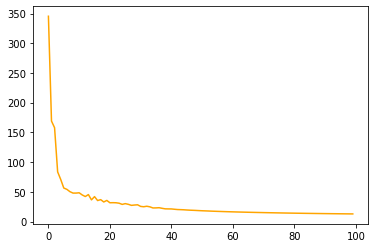

In [ ]:
def REG_MLP(dados,iteracoes=100):
  y_treino, y_teste ,X_treino, X_teste = dividir_treino_teste(dados)

  X_normalize = normalize_01(X_treino)
  X_treino = X_normalize.norma(X_treino)
  X_treino = np.c_[(np.ones(X_treino.shape[0]), X_treino)]
  X_teste = np.c_[(np.ones(X_teste.shape[0]), X_teste)]

  parametros = {'hidden_layer_sizes': (25, 50, 75, 100),
                'learning_rate': ('constant','adaptive'), 
                'batch_size':(70, 90, 100, 130, 'auto'),
                'activation':('tanh','relu')}

  Modelo = mlp_r(solver= 'sgd', max_iter= iteracoes, random_state= 0, verbose= False, learning_rate_init= 0.01, 
                 early_stopping= False, momentum= 0.9, nesterovs_momentum= False, shuffle=False)

  #Random Search
  Model = RandomSearch(Modelo, parametros, refit= True, cv= 5, verbose= False)

  #Resultado do Random Search
  Model.fit(X_treino, y_treino.ravel())
  mark = pd.DataFrame(Model.cv_results_)
  print(f"Resultados Random Search: \n{mark[['params','mean_test_score','std_test_score','rank_test_score']].to_markdown()}")

  #Treinando o modelo com os melhores parametros do Random Search
  Modelo.set_params(**Model.best_params_)

  #Adiquirindo as méticas
  Modelo.fit(X_treino, y_treino.ravel())
  Treino_Perda = Modelo.loss_curve_
  Modelo.fit(X_teste, y_teste.ravel())
  Teste_Perda = Modelo.loss_curve_
  
  return Treino_Perda, Teste_Perda

Treino_Perda, Teste_Perda = REG_MLP(concrete_dataset)

plt.plot(range(100), Treino_Perda, color= 'orange', label= 'RMSE_Treino')
plt.plot(range(100), Teste_Perda, color= 'b', label= 'RMSE_Teste')
plt.title("RMSE: Treino X Teste")
plt.legend()
plt.close()

plt.plot(range(100), Treino_Perda, color= 'orange', label= 'MAE_Treino')
plt.plot(range(100), Teste_Perda, color= 'b', label= 'MAE_Teste')
plt.title("MAE: Treino X Teste")
plt.legend()
plt.close()

plt.plot(range(100), Treino_Perda, color= 'orange', label= 'MRE_Treino')
plt.plot(range(100), Teste_Perda, color= 'b', label= 'MRE_Teste')
plt.title("MRE: Treino X Teste")
plt.legend()
plt.close()

# **Questão 2:**

In [ ]:
def CLA_MLP(dados,iteracoes=1000):
  y_treino, y_teste ,X_treino, X_teste = dividir_treino_teste(dados)

  X_normalize = normalize_01(X_treino)
  X_treino = X_normalize.norma(X_treino)
  X_treino = np.c_[(np.ones(X_treino.shape[0]), X_treino)]
  X_teste = np.c_[(np.ones(X_teste.shape[0]), X_teste)]

  parametros = {'hidden_layer_sizes': (25, 50, 75, 100),
                'learning_rate': ('constant','adaptive'), 
                'batch_size':(70, 90, 100, 130, 'auto'),
                'activation':('tanh','relu')}

  Modelo = mlp_c(solver= 'sgd', max_iter= iteracoes, random_state= 0, verbose= False, learning_rate_init= 0.01, 
                 early_stopping= False, momentum= 0.9, nesterovs_momentum= False, shuffle= False)

  #Random Search
  Model = RandomSearch(Modelo, parametros, refit= True, cv= 5, verbose= False)

  #Resultado do Random Search
  Model.fit(X_treino, y_treino.ravel())
  mark = pd.DataFrame(Model.cv_results_)
  print(f"Resultados Random Search: \n{mark[['params','mean_test_score','std_test_score','rank_test_score']].to_markdown()}")

  #Treinando o modelo com os melhores parametros do Random Search
  Modelo.set_params(**Model.best_params_)

  #Adiquirindo as méticas
  Modelo.fit(X_treino, y_treino.ravel())
  Treino_Perda = Modelo.predict(X_treino)

  Modelo.fit(X_teste, y_teste.ravel())
  Teste_Perda = Modelo.predict(X_teste)
  
  return Treino_Perda, Teste_Perda, y_treino, y_teste

Treino_Perda, Teste_Perda, y_treino, y_teste = CLA_MLP(vowel_dataset)

metr_treino = metricas(y_treino, Treino_Perda)
print(f"Acuracia: {metr_treino['Acuracia']:.2%} \n"
      f"Revocacao: {metr_treino['Revocacao']:.2%} \n"
      f"Precisao: {metr_treino['Precisao']:.2%} \n"
      f"F1_Score: {metr_treino['F1_Score']:.2%} \n")